In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Link to the Dataset
https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales?resource=download

In [2]:
bakery = pd.read_csv("Bakery sales.csv")
bakery.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [3]:
print(bakery.columns)

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')


In [4]:
## Column 'time' is irrelevant for our purposes
bakery.drop('time', axis=1, inplace=True)

In [5]:
#Convert 'date' column to datetime
bakery['date'] = pd.to_datetime(bakery['date'])
bakery.set_index('date', inplace=True)

In [6]:
# Group data by 'article' and by month, and sum the 'Quantity'
monthly_sales = bakery.groupby([pd.Grouper(freq='M'), 'article'])['Quantity'].sum().unstack()

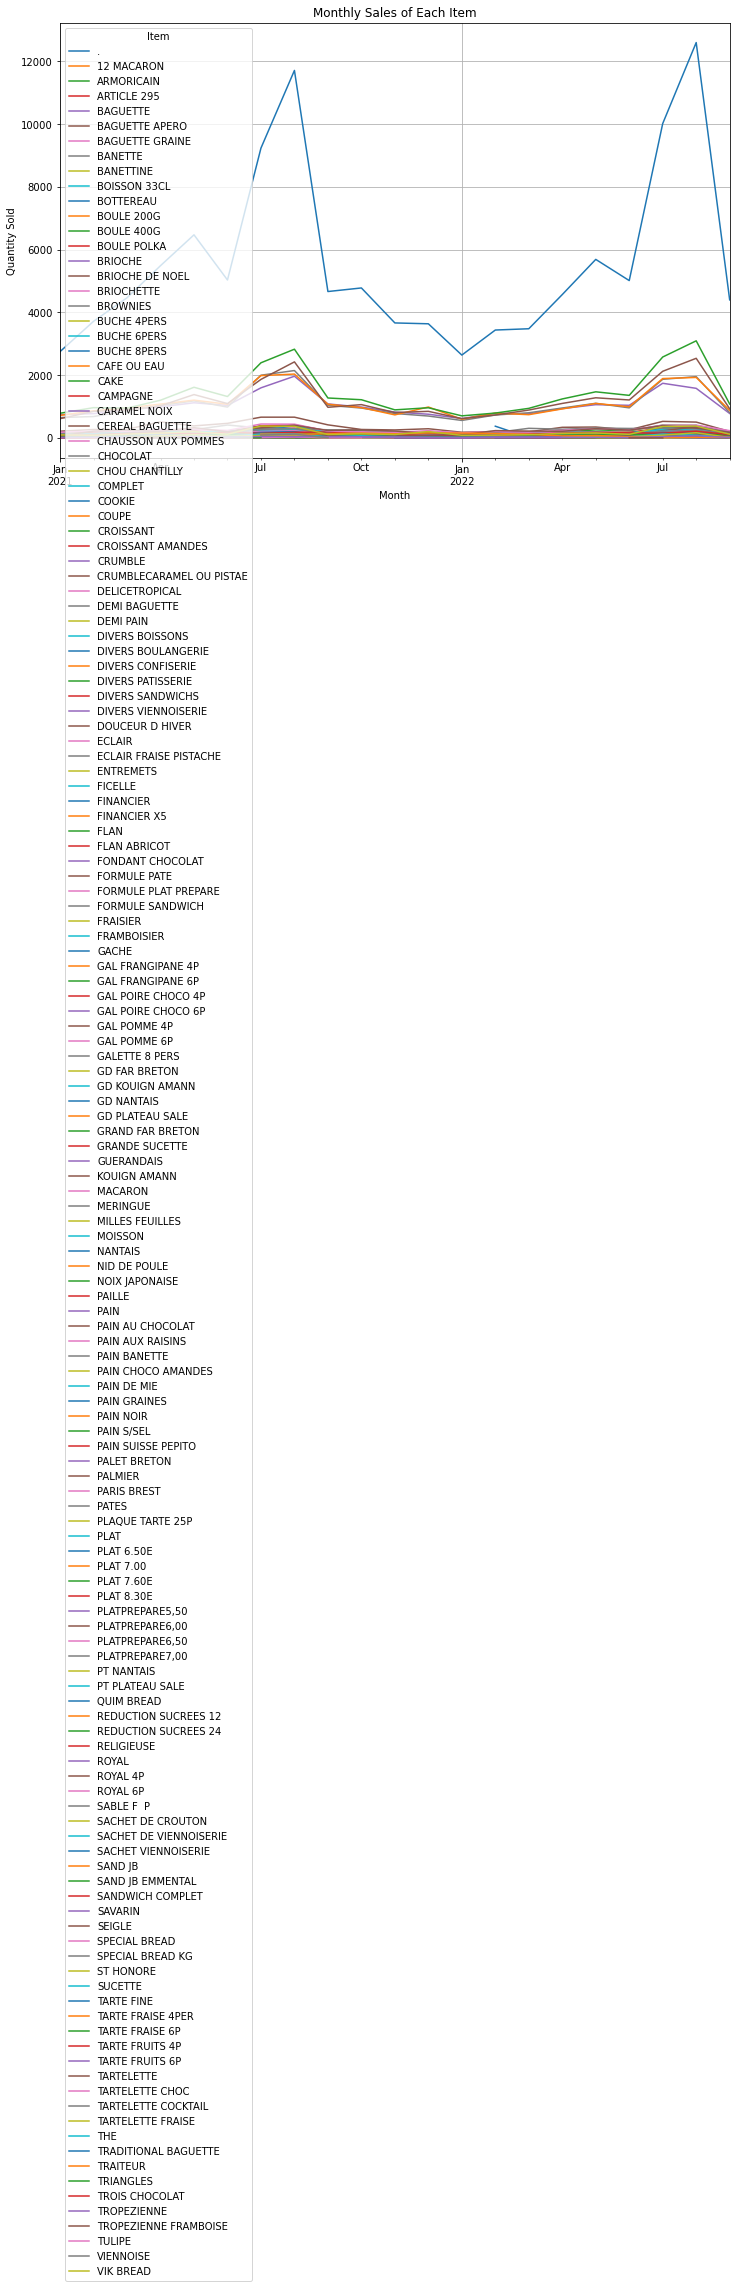

In [7]:
#Line Plot to compare Article Sales by month
plt.figure(figsize=(12,8))
for column in monthly_sales.columns:
    monthly_sales[column].plot(label=column)
plt.title('Monthly Sales of Each Item')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Item')
plt.grid(True)
plt.show()

There are too many products included in the graph that are likely not important for the French Bakery to understnad the trend of items being sold. I will focus the monthly sales of only the top 10 highest grossing items for the bakery to focus on revenue.  

In [8]:
#Convert 'unti_price' into a float and rid of euro sign
bakery['unit_price'] = bakery['unit_price'].replace('[€,]', '', regex=True).replace(',', '.', regex=True)

#Convert quantity and unit_price to numeric data types
bakery['Quantity'] = pd.to_numeric(bakery['Quantity'], errors='coerce')
bakery['unit_price'] = pd.to_numeric(bakery['unit_price'], errors='coerce')

#look for nuyll
print(bakery[['Quantity', 'unit_price']].isnull().sum())

Quantity      0
unit_price    0
dtype: int64


In [10]:
#Calculate total revenue per item
bakery['total_revenue'] = bakery['Quantity'] * bakery['unit_price']

#Sum revenue per item
revenue_item = bakery.groupby('article')['total_revenue'].sum()

#Identify top 10 items
top10 = revenue_item.nlargest(10).index.tolist()
print(top10)

['TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'CROISSANT', 'PAIN AU CHOCOLAT', 'BANETTE', 'BAGUETTE', 'SANDWICH COMPLET', 'SPECIAL BREAD', 'TRAITEUR', 'GRAND FAR BRETON']


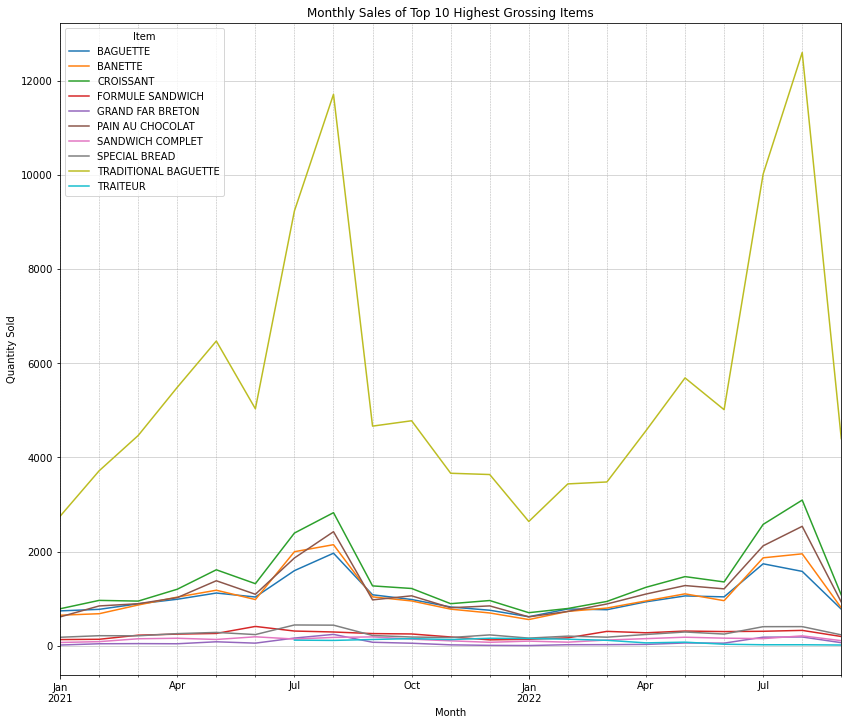

In [16]:
#Filter only top 10 items
top10ds = bakery[bakery['article'].isin(top10)]

#Like the previous graph, group by month and item and sum quantities 
top10monthly = top10ds.groupby([pd.Grouper(freq='M'), 'article'])['Quantity'].sum().unstack()

#Line Graph
plt.figure(figsize = (14,12))
for column in top10monthly.columns:
    top10monthly[column].plot(label=column)
plt.title('Monthly Sales of Top 10 Highest Grossing Items')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Item')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.tight_layout
plt.show()